In [1]:
import pandas as pd
import os
from get_repo_name import get_repo_name

repo_name = get_repo_name ( os.path.basename ( os.getcwd() ) )
dataset_path = f'datasets/{repo_name}_groupedby_yearmonth.csv'
df = pd.read_csv (dataset_path)
df

,year_month,commit_count,additions,deletions,agg_loc,agg_complexity,agg_token_count,dmm_unit_size,dmm_unit_complexity,dmm_unit_interfacing
0,2011-04,10,6018,473,1767.0,802.0,21032.0,0.607772,0.585377,0.806309
1,2011-05,7,4124,2398,80.0,20.0,664.0,0.275748,0.814401,0.803438
2,2011-06,44,3058,4872,384.0,295.0,9813.0,0.723452,0.640178,0.420451
3,2011-07,19,975,449,267.0,59.0,2183.0,1.000000,0.000000,0.000000
4,2011-08,194,7538,6520,3125.0,1235.0,26259.0,0.779613,0.550695,0.630656
...,...,...,...,...,...,...,...,...,...,...
113,2022-03,84,3079,3876,17215.0,2958.0,97012.0,0.373446,0.572800,0.549909
114,2022-04,76,5804,3674,7308.0,1316.0,43495.0,0.712159,0.316700,0.882979
115,2022-05,76,17944,16621,33802.0,9845.0,256934.0,0.623509,0.834515,0.099291
116,2022-06,47,2948,2503,11361.0,2273.0,68556.0,0.583333,0.583333,0.728070


In [2]:
df['dmm_unit_size'] = df['dmm_unit_size'].fillna(0)
df['dmm_unit_complexity'] = df['dmm_unit_complexity'].fillna(0)
df['dmm_unit_interfacing'] = df['dmm_unit_interfacing'].fillna(0)

In [3]:
start_date = df.year_month[0][5:7] + '-01-' + df.year_month[0][0:4]
end_date = df.year_month[len(df.year_month) - 1][5:7] + '-01-' + df.year_month[len(df.year_month) - 1][0:4]
dfperiod = pd.period_range(start_date, end_date, freq='M')

def new_zero_row ( year_month ):
    
    new_row = {
        'year_month': year_month,
        'commit_count': 0,
        'additions': 0,
        'deletions': 0,
        'agg_loc': 0,
        'agg_complexity': 0,
        'agg_token_count': 0,
        'dmm_unit_size': 0,
        'dmm_unit_complexity': 0,
        'dmm_unit_interfacing': 0
    }
    
    return new_row

for year_month in dfperiod:
    if df [ ( df['year_month'] == str(year_month) ) ].shape[0] == 0:
        df = df.append ( new_zero_row(year_month), ignore_index = True )

df.shape

(136, 10)

In [4]:
df['year_month'] = df['year_month'].astype(str)
df = df.sort_values ( by=['year_month'] )
df.reset_index(drop=True, inplace=True)
df

,year_month,commit_count,additions,deletions,agg_loc,agg_complexity,agg_token_count,dmm_unit_size,dmm_unit_complexity,dmm_unit_interfacing
0,2011-04,10,6018,473,1767.0,802.0,21032.0,0.607772,0.585377,0.806309
1,2011-05,7,4124,2398,80.0,20.0,664.0,0.275748,0.814401,0.803438
2,2011-06,44,3058,4872,384.0,295.0,9813.0,0.723452,0.640178,0.420451
3,2011-07,19,975,449,267.0,59.0,2183.0,1.000000,0.000000,0.000000
4,2011-08,194,7538,6520,3125.0,1235.0,26259.0,0.779613,0.550695,0.630656
...,...,...,...,...,...,...,...,...,...,...
131,2022-03,84,3079,3876,17215.0,2958.0,97012.0,0.373446,0.572800,0.549909
132,2022-04,76,5804,3674,7308.0,1316.0,43495.0,0.712159,0.316700,0.882979
133,2022-05,76,17944,16621,33802.0,9845.0,256934.0,0.623509,0.834515,0.099291
134,2022-06,47,2948,2503,11361.0,2273.0,68556.0,0.583333,0.583333,0.728070


In [5]:
df.to_csv ( f'datasets/{repo_name}_final.csv', index = False )

# Analysis

In [6]:
for idx in range(1, 10):
    ma_prefix = 'ma_'
    df[ma_prefix + df.columns[idx]] = df[df.columns[idx]].rolling ( window = 3 ).mean()
df

,year_month,commit_count,additions,deletions,agg_loc,agg_complexity,agg_token_count,dmm_unit_size,dmm_unit_complexity,dmm_unit_interfacing,ma_commit_count,ma_additions,ma_deletions,ma_agg_loc,ma_agg_complexity,ma_agg_token_count,ma_dmm_unit_size,ma_dmm_unit_complexity,ma_dmm_unit_interfacing
0,2011-04,10,6018,473,1767.0,802.0,21032.0,0.607772,0.585377,0.806309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-05,7,4124,2398,80.0,20.0,664.0,0.275748,0.814401,0.803438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-06,44,3058,4872,384.0,295.0,9813.0,0.723452,0.640178,0.420451,20.333333,4400.000000,2581.000000,743.666667,372.333333,10503.000000,0.535657,0.679985,0.676733
3,2011-07,19,975,449,267.0,59.0,2183.0,1.000000,0.000000,0.000000,23.333333,2719.000000,2573.000000,243.666667,124.666667,4220.000000,0.666400,0.484860,0.407963
4,2011-08,194,7538,6520,3125.0,1235.0,26259.0,0.779613,0.550695,0.630656,85.666667,3857.000000,3947.000000,1258.666667,529.666667,12751.666667,0.834355,0.396958,0.350369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2022-03,84,3079,3876,17215.0,2958.0,97012.0,0.373446,0.572800,0.549909,72.000000,5242.000000,6070.000000,22164.666667,4019.333333,128185.000000,0.389478,0.578594,0.585479
132,2022-04,76,5804,3674,7308.0,1316.0,43495.0,0.712159,0.316700,0.882979,83.333333,4044.333333,3569.333333,16961.666667,2995.666667,97286.333333,0.419585,0.451882,0.633879
133,2022-05,76,17944,16621,33802.0,9845.0,256934.0,0.623509,0.834515,0.099291,78.666667,8942.333333,8057.000000,19441.666667,4706.333333,132480.333333,0.569705,0.574672,0.510726
134,2022-06,47,2948,2503,11361.0,2273.0,68556.0,0.583333,0.583333,0.728070,66.333333,8898.666667,7599.333333,17490.333333,4478.000000,122995.000000,0.639667,0.578183,0.570113


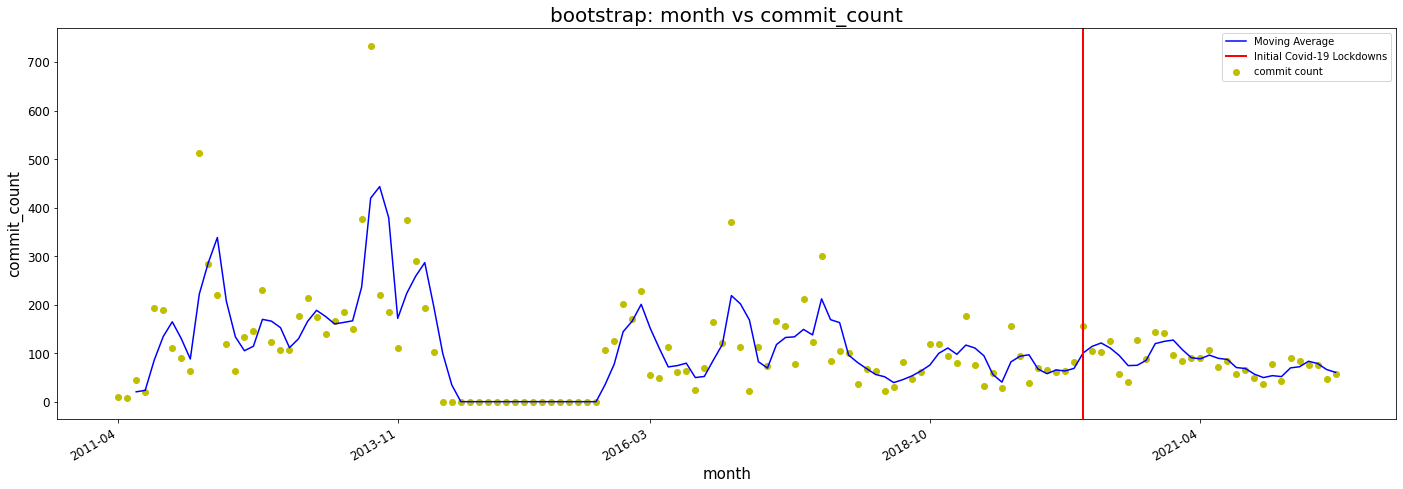

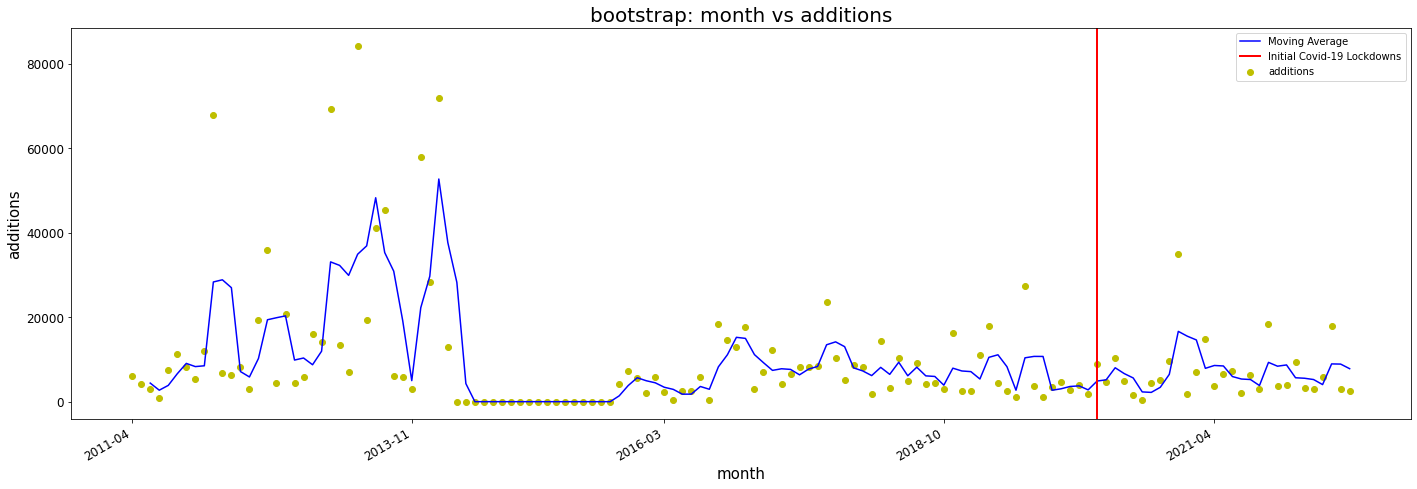

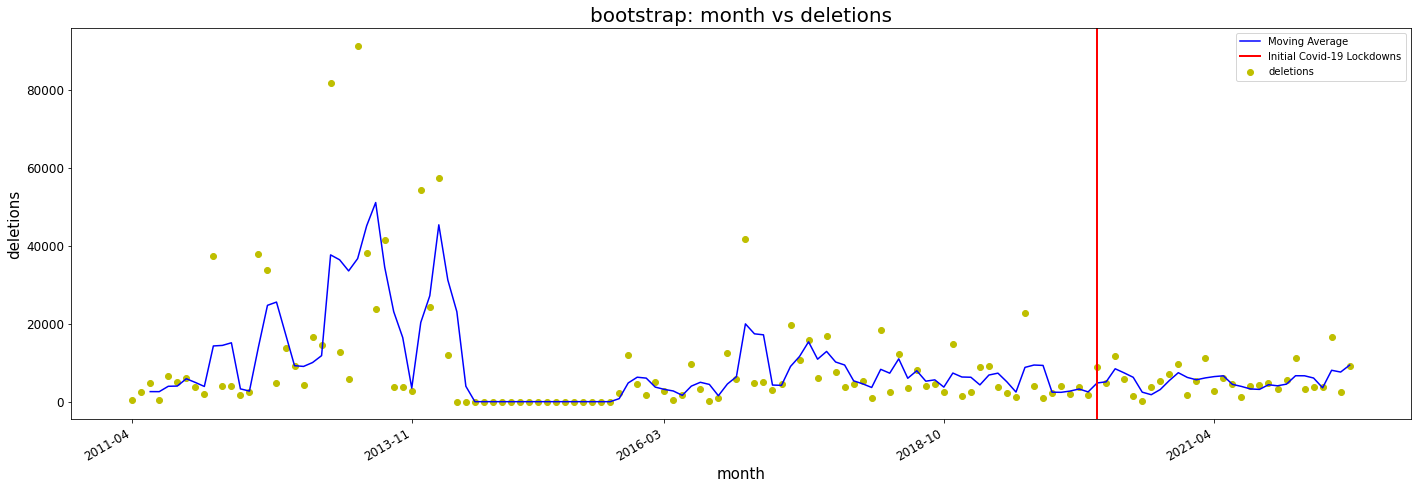

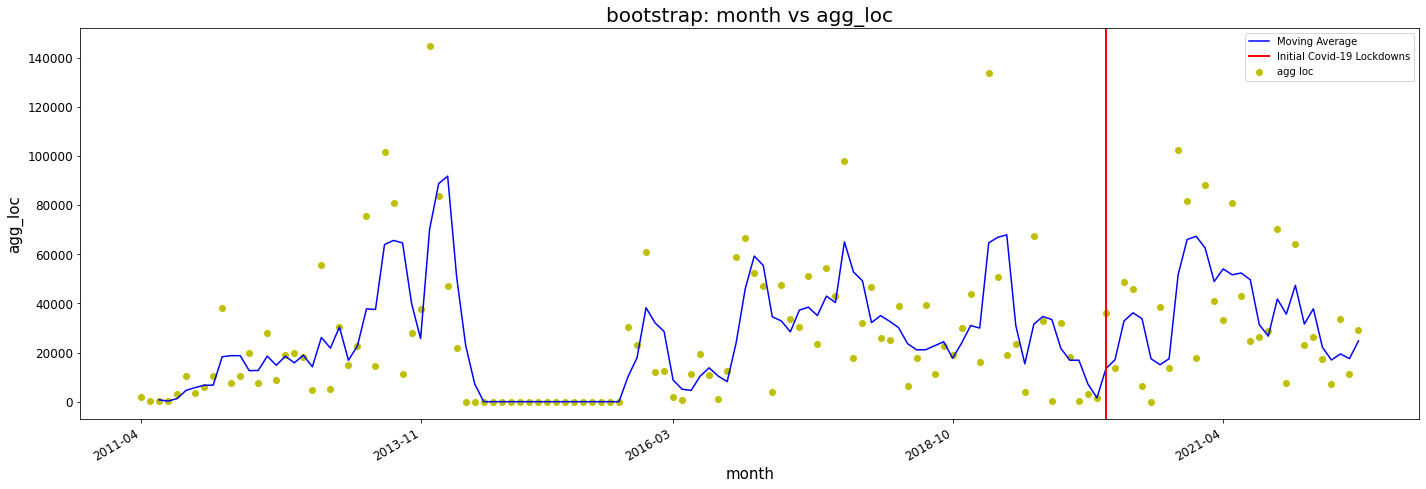

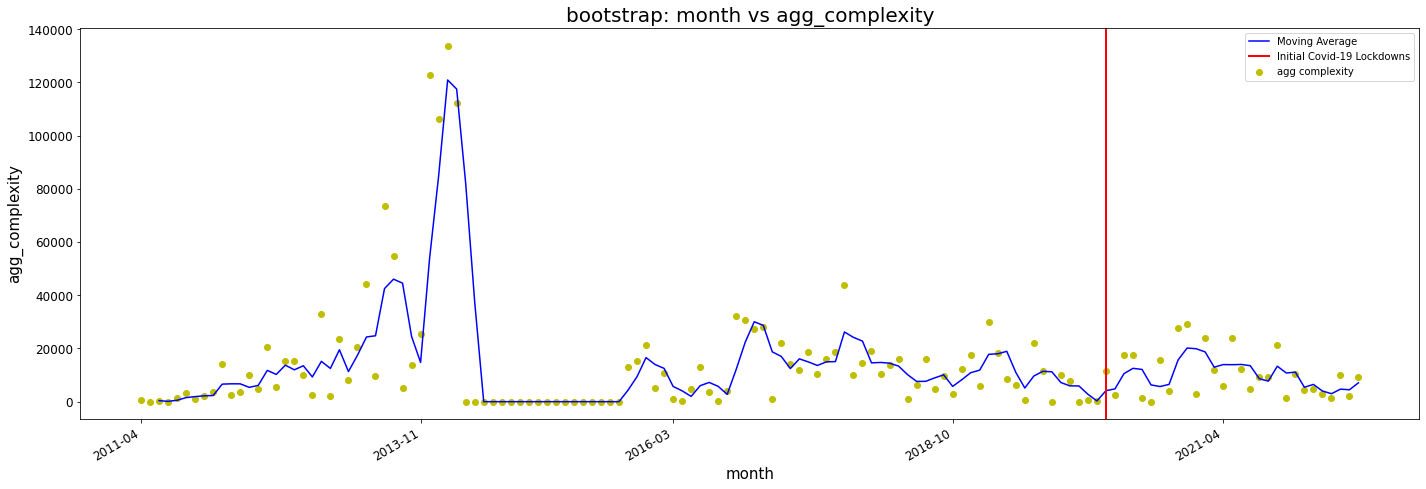

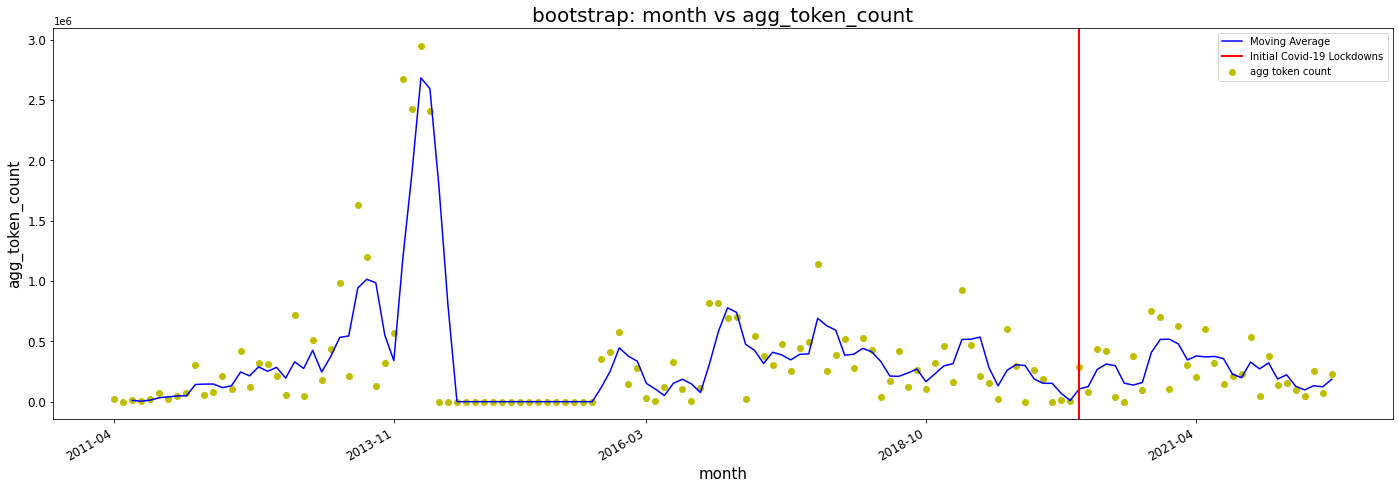

In [7]:
from plot_line_lib import plot_line

for idx in range ( 1, 7 ):
    
    images_path = f'images/'
    plot_line ( df.columns[idx], idx, df, images_path, repo_name, major_locator = True )

In [8]:
from analysis_lib import year_pre_covid_ym, pre_covid_ym, covid_ym, year_post_covid_ym

df = df.set_index(df['year_month'])

df1 = df [ year_pre_covid_ym : pre_covid_ym ]
df2 = df [ covid_ym : year_post_covid_ym ]
df1 = df1.reset_index ( drop = True )
df2 = df2.reset_index ( drop = True )

df1.shape, df2.shape

((12, 19), (12, 19))

In [9]:
from analysis_lib import calc_and_compare_means

calc_and_compare_means ( df1, df2 )

Pre and Post-Covid Mean Comparisons:
commit count :  69  vs  106  ->  Up (53.6%)
additions :  6213  vs  7855  ->  Up (26.4%)
deletions :  4844  vs  5479  ->  Up (13.1%)
agg loc :  21020  vs  41109  ->  Up (95.6%)
agg complexity :  7163  vs  12814  ->  Up (78.9%)
agg token count :  187224  vs  326709  ->  Up (74.5%)


# Distribution

In [10]:
from analysis_lib import get_equilibrium_pc

print("Pre-pandemic equilibrium percentages:")
for idx in range ( 1, 7 ):
    print ( f'{df1.columns[idx]} = { get_equilibrium_pc ( list ( df1[df1.columns[idx]] ) ) }' )
    
print("\nPost-pandemic equilibrium percentages:")
for idx in range ( 1, 7 ):
    print ( f'{df2.columns[idx]} = { get_equilibrium_pc ( list ( df2[df2.columns[idx]] ) ) }' )

Pre-pandemic equilibrium percentages:
commit_count = 41.7
additions = 16.7
deletions = 16.7
agg_loc = 25.0
agg_complexity = 25.0
agg_token_count = 25.0

Post-pandemic equilibrium percentages:
commit_count = 41.7
additions = 25.0
deletions = 33.3
agg_loc = 25.0
agg_complexity = 25.0
agg_token_count = 25.0


In [11]:
from analysis_lib import get_pareto_pc

print("Pre-pandemic pareto percentages:")
for idx in range ( 1, 7 ):
    print ( f'{df1.columns[idx]} = { get_pareto_pc ( list ( df1[df1.columns[idx]] ) ) }' )
    
print("\nPost-pandemic pareto percentages:")
for idx in range ( 1, 7 ):
    print ( f'{df2.columns[idx]} = { get_pareto_pc ( list ( df2[df2.columns[idx]] ) ) }' )

Pre-pandemic pareto percentages:
commit_count = 66.7
additions = 50.0
deletions = 50.0
agg_loc = 41.7
agg_complexity = 41.7
agg_token_count = 41.7

Post-pandemic pareto percentages:
commit_count = 75.0
additions = 50.0
deletions = 58.3
agg_loc = 50.0
agg_complexity = 50.0
agg_token_count = 50.0
